<a href="https://colab.research.google.com/github/nosdeased/Aula_02_Bootcamp_Web-Scraping/blob/main/Aula_02_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
URL = 'https://www.al.sp.gov.br/repositorioDados/deputados/deputados.xml'

Conexão = requests.get( URL)

Base_Deputados = pd.read_xml(Conexão.content)

Base_Deputados.head()

,IdDeputado,IdSPL,IdUA,Situacao,Andar,Aniversario,Biografia,Email,Matricula,NomeParlamentar,PathFoto,Sala,Partido,Telefone
0,547,1000000335,20455,EXE,2º andar,26/08,"<p style=""outline: none; color: #121212; margi...",apfdanilobalas@al.sp.gov.br,300607,Agente Federal Danilo Balas,http://www3.al.sp.gov.br/repositorio/deputadoP...,255,PL,(11) 3886-6052/ 6054
1,546,1000000342,20399,EXE,1º,17/09,"<p>Alexander Muniz de Oliveira, nascido na cid...",alexdemadureira@al.sp.gov.br,300608,Alex Madureira,http://www3.al.sp.gov.br/repositorio/deputadoP...,173,PL,(11) 3886-6676/ 6677
2,545,1000000351,20420,EXE,Térreo,25/09,"<p><span style=""font-family: arial, helvetica,...",altairmoraes@al.sp.gov.br,300609,Altair Moraes,http://www3.al.sp.gov.br/repositorio/deputadoP...,T. 53,REPUBLICANOS,(11) 3886-6468/ 6476
3,1622,1000000948,20443,EXE,Térreo,null/null,"<p>.</p>\n<div id=""acfifjfajpekbmhmjppnmmjgmhj...",acrbserra@al.sp.gov.br,300657,Ana Carolina Serra,http://www3.al.sp.gov.br/repositorio/deputadoP...,T44,CIDADANIA,(11) 3886-6066/ 6067
4,81,10587,20436,EXE,Térreo,22/08,"<p style=""outline: none; color: #121212; font-...",anaperugini@al.sp.gov.br,300466,Ana Perugini,http://www3.al.sp.gov.br/repositorio/deputadoP...,T49,PT,(11) 3886-6082/ 6083


<ipython-input-3-c70b229c75f2>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


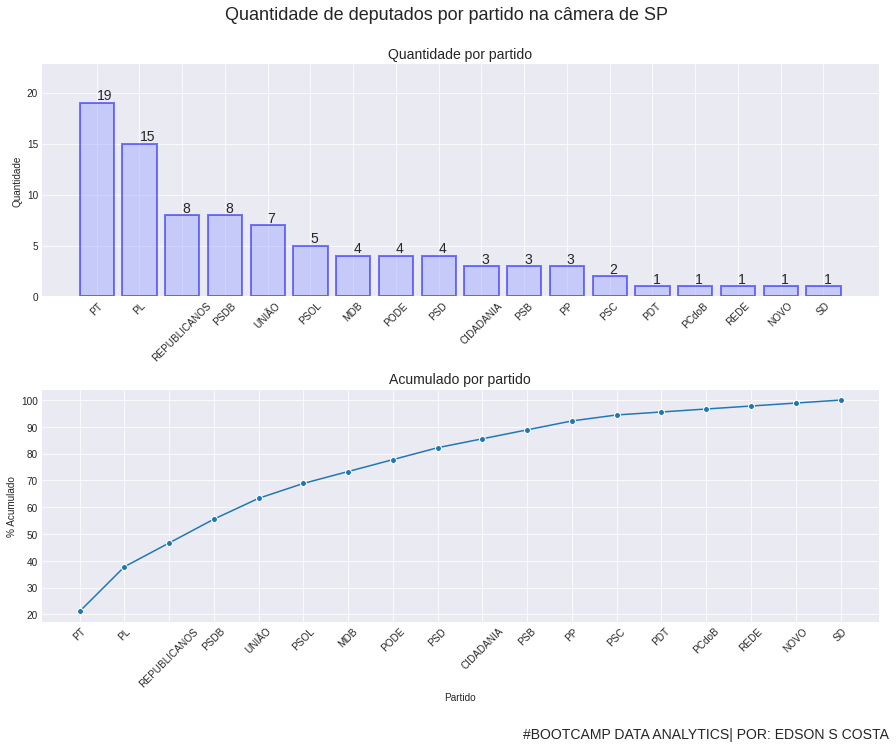

In [3]:
Analise = Base_Deputados.groupby(by=['Partido']).count().sort_values( by=['IdDeputado'],ascending=False)
Analise_Perc = Analise.IdDeputado.cumsum() / Analise.IdDeputado.sum() * 100
Figura = plt.figure( figsize=(15, 10))

plt.style.use('seaborn-darkgrid')
plt.suptitle('Quantidade de deputados por partido na câmera de SP', fontsize= 18)

plt.subplot(2, 1, 1)
plt.title('Quantidade por partido', fontsize=14)
plt.bar(
    Analise.index,
    Analise.IdDeputado,
    color='#a3acff',
    linewidth=2,
    edgecolor='blue',
    alpha=0.5
 )

plt.ylabel('Quantidade')
plt.xticks(rotation=45)

plt.ylim([0,Analise.IdDeputado.max() + Analise.IdDeputado.max() * 0.2])

for loop in range(len(Analise)):
  plt.text( x = Analise.index[loop], y = Analise.IdDeputado[loop]+ 0.3, s=Analise.IdDeputado[loop],size=14)

plt.subplot(2, 1, 2)
plt.title('Acumulado por partido', fontsize=14)
plt.plot(
    Analise_Perc.index,
    Analise_Perc.values,
    marker='o',
    markeredgecolor='#fff'
)

plt.ylabel('% Acumulado')
plt.xlabel('Partido')
plt.xticks(rotation=45);

plt.subplots_adjust(hspace=0.4, top=0.9)

rodape = '#BOOTCAMP DATA ANALYTICS| POR: EDSON S COSTA'
Figura.text(0.91, -0.04, rodape, ha='right', va = 'bottom', size=14);